# Student Information
Name:游堯中

Student ID: 107065533

GitHub ID: bill-yc-yu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import nltk
import plotly
import helpers.data_mining_helpers as dmh

In [3]:
data = pd.read_csv('amazon_cells_labelled.txt', sep="\t", header = None)
data.columns = ["text", "label"]
data['web'] = 'amazon'
#create a dataframe from amazon dataset

In [4]:
temp = pd.read_csv('imdb_labelled.txt', sep="\t", header = None)
temp.columns = ["text", "label"]
temp['web'] = 'imdb'
#create an imdb dataframe

In [5]:
data =data.append(temp, ignore_index = True)
#append imdb to amazon, forming the big dataset

In [6]:
temp = pd.read_csv('yelp_labelled.txt', sep="\t", header = None)
temp.columns = ["text", "label"]
temp['web'] = 'yelp'
#creat yelp dataframe

In [7]:
data = data.append(temp, ignore_index = True)
#append, creating the final dataframe

In [8]:
data

,text,label,web
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2743,I think food should have flavor and texture an...,0,yelp
2744,Appetite instantly gone.,0,yelp
2745,Overall I was not impressed and would not go b...,0,yelp
2746,"The whole experience was underwhelming, and I ...",0,yelp


In [9]:
data.loc[lambda t: t.web == "imdb"]

,text,label,web
1000,"A very, very, very slow-moving, aimless movie ...",0,imdb
1001,Not sure who was more lost - the flat characte...,0,imdb
1002,Attempting artiness with black & white and cle...,0,imdb
1003,Very little music or anything to speak of.,0,imdb
1004,The best scene in the movie was when Gerardo i...,1,imdb
...,...,...,...
1743,I just got bored watching Jessice Lange take h...,0,imdb
1744,"Unfortunately, any virtue in this film's produ...",0,imdb
1745,"In a word, it is embarrassing.",0,imdb
1746,Exceptionally bad!,0,imdb


In [10]:
data.web

0       amazon
1       amazon
2       amazon
3       amazon
4       amazon
         ...  
2743      yelp
2744      yelp
2745      yelp
2746      yelp
2747      yelp
Name: web, Length: 2748, dtype: object

# missing value

In [11]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

text     (The amoung of missing records is: , 0)
label    (The amoung of missing records is: , 0)
web      (The amoung of missing records is: , 0)
dtype: object

no missing values

In [12]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "label"])

In [13]:
result_with_series = data.append(dummy_series, ignore_index=True)
#add one record with one missing value

In [14]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text     (The amoung of missing records is: , 0)
label    (The amoung of missing records is: , 0)
web      (The amoung of missing records is: , 1)
dtype: object

There is one missing value

In [15]:
data.dropna(inplace=True)

In [16]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

text     (The amoung of missing records is: , 0)
label    (The amoung of missing records is: , 0)
web      (The amoung of missing records is: , 0)
dtype: object

# Dealing with Duplicate Data

In [17]:
sum(data.duplicated())

17

In [18]:
duplicate_rows = data[data.duplicated()]

In [19]:
duplicate_rows

,text,label,web
285,Great phone!.,1,amazon
407,Works great.,1,amazon
524,Works great!.,1,amazon
543,Don't buy this product.,0,amazon
744,If you like a loud buzzing to override all you...,0,amazon
748,Does not fit.,0,amazon
778,This is a great deal.,1,amazon
792,Great Phone.,1,amazon
892,Excellent product for the price.,1,amazon
896,Great phone.,1,amazon


In [20]:
data.drop_duplicates(inplace=True)

In [21]:
len(data)

2731

2748 - 17 = 2731, successfully drop all the duplicates

# sampling

In [22]:
data_sample = data.sample(n = 300)

In [23]:
len(data_sample)

300

In [24]:
data_sample.head()

,text,label,web
1918,We also ordered the spinach and avocado salad;...,0,yelp
31,This product is ideal for people like me whose...,1,amazon
383,After trying many many handsfree gadgets this ...,1,amazon
571,This fixes all the problems.,1,amazon
1122,Maybe there would be a reasonable explanation ...,0,imdb


In [25]:
#proportion of each website
print("data")
print('amazon\t' + str(sum(data.web == 'amazon') / len(data)))
print('imdb\t' + str(sum(data.web == 'imdb') / len(data)))
print('yelp\t' + str(sum(data.web == 'yelp') / len(data)))

print("\nsample")
print('amazon\t' + str(sum(data_sample.web == 'amazon') / len(data_sample)))
print('imdb\t' + str(sum(data_sample.web == 'imdb') / len(data_sample)))
print('yelp\t' + str(sum(data_sample.web == 'yelp') / len(data_sample)))

data
amazon	0.3625045770779934
imdb	0.27279384840717685
yelp	0.3647015745148297

sample
amazon	0.39666666666666667
imdb	0.24333333333333335
yelp	0.36


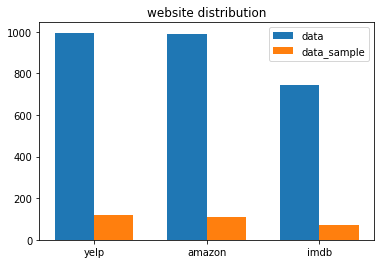

In [26]:
#grouped bar chart of the original dataset and the sampo
fig, ax = plt.subplots()
labels = ['yelp', 'amazon','imdb']
data_means = data.web.value_counts()
data_sample_means = data_sample.web.value_counts()

a = np.arange(len(labels))
width = 0.35

rects1 = ax.bar(a - width/2, data_means, width, label='data')
rects2 = ax.bar(a + width/2, data_sample_means, width, label='data_sample')

ax.set_title('website distribution')
ax.set_xticks(a)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# Feature creation

In [27]:
data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x))

In [28]:
data['unigrams'].head()

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
Name: unigrams, dtype: object

In [29]:
data.head()

,text,label,web,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,"[The, mic, is, great, .]"


In [30]:
list(data[6:7]['unigrams'])

[['If',
  'you',
  'have',
  'several',
  'dozen',
  'or',
  'several',
  'hundred',
  'contacts',
  ',',
  'then',
  'imagine',
  'the',
  'fun',
  'of',
  'sending',
  'each',
  'of',
  'them',
  'one',
  'by',
  'one',
  '.']]

# Feature subset selection

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.text)

In [32]:
analyze = count_vect.build_analyzer()

In [33]:
data_counts.shape

(2731, 5155)

In [34]:
count_vect.get_feature_names()[:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [35]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[30:50]]

In [36]:
plot_x

['term_23',
 'term_24',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_325',
 'term_35',
 'term_350',
 'term_375',
 'term_3o',
 'term_40',
 'term_40min',
 'term_42',
 'term_44',
 'term_45',
 'term_4s',
 'term_4ths',
 'term_50',
 'term_5020']

In [37]:
plot_y = ["doc_"+ str(i) for i in list(data.index)[30:50]]

In [38]:
plot_y

['doc_30',
 'doc_31',
 'doc_32',
 'doc_33',
 'doc_34',
 'doc_35',
 'doc_36',
 'doc_37',
 'doc_38',
 'doc_39',
 'doc_40',
 'doc_41',
 'doc_42',
 'doc_43',
 'doc_44',
 'doc_45',
 'doc_46',
 'doc_47',
 'doc_48',
 'doc_49']

In [39]:
plot_z = data_counts[30:50, 30:50].toarray()

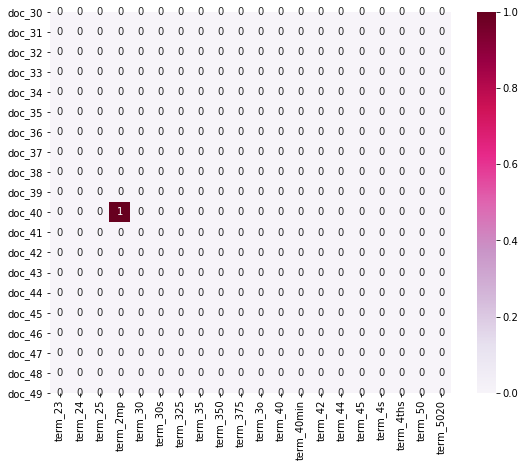

In [40]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# Dimensionality reduction

In [41]:
from sklearn.decomposition import PCA

In [42]:
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())

In [43]:
data_reduced.shape

(2731, 2)

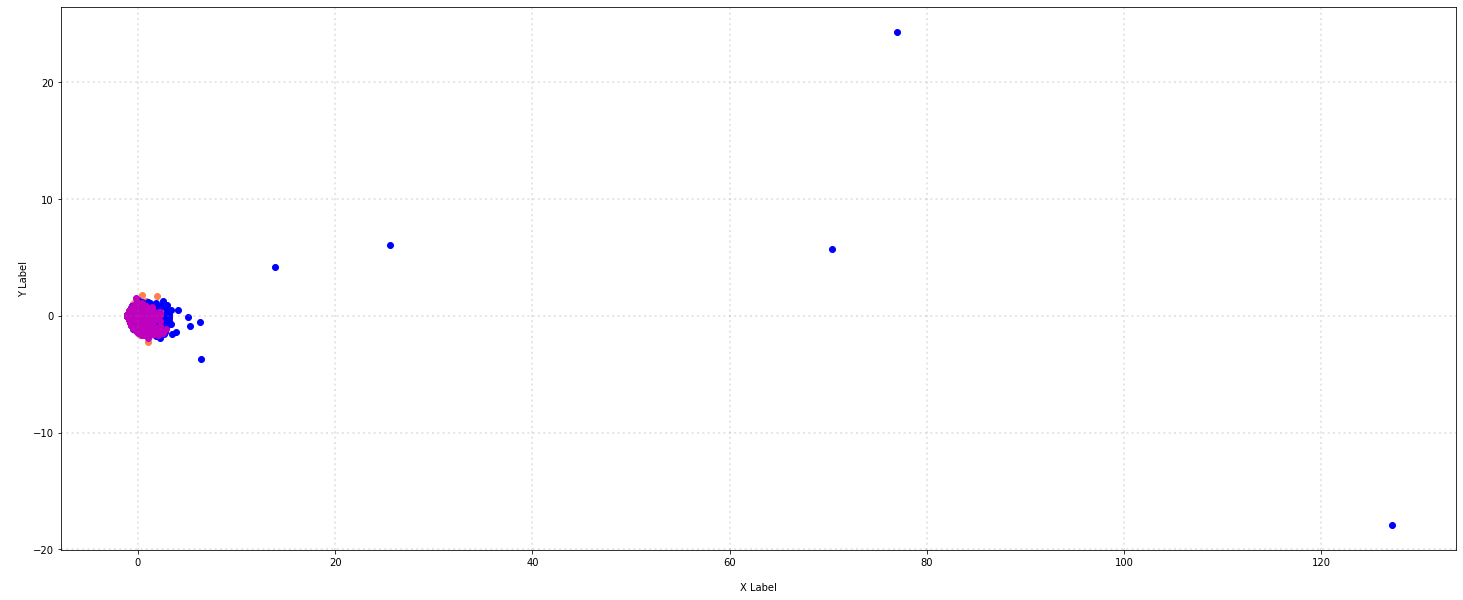

In [44]:
col = ['coral', 'blue', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, web in zip(col, ['amazon', 'imdb', 'yelp']):
    xs = data_reduced[data['web'] == web].T[0]
    ys = data_reduced[data['web'] == web].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

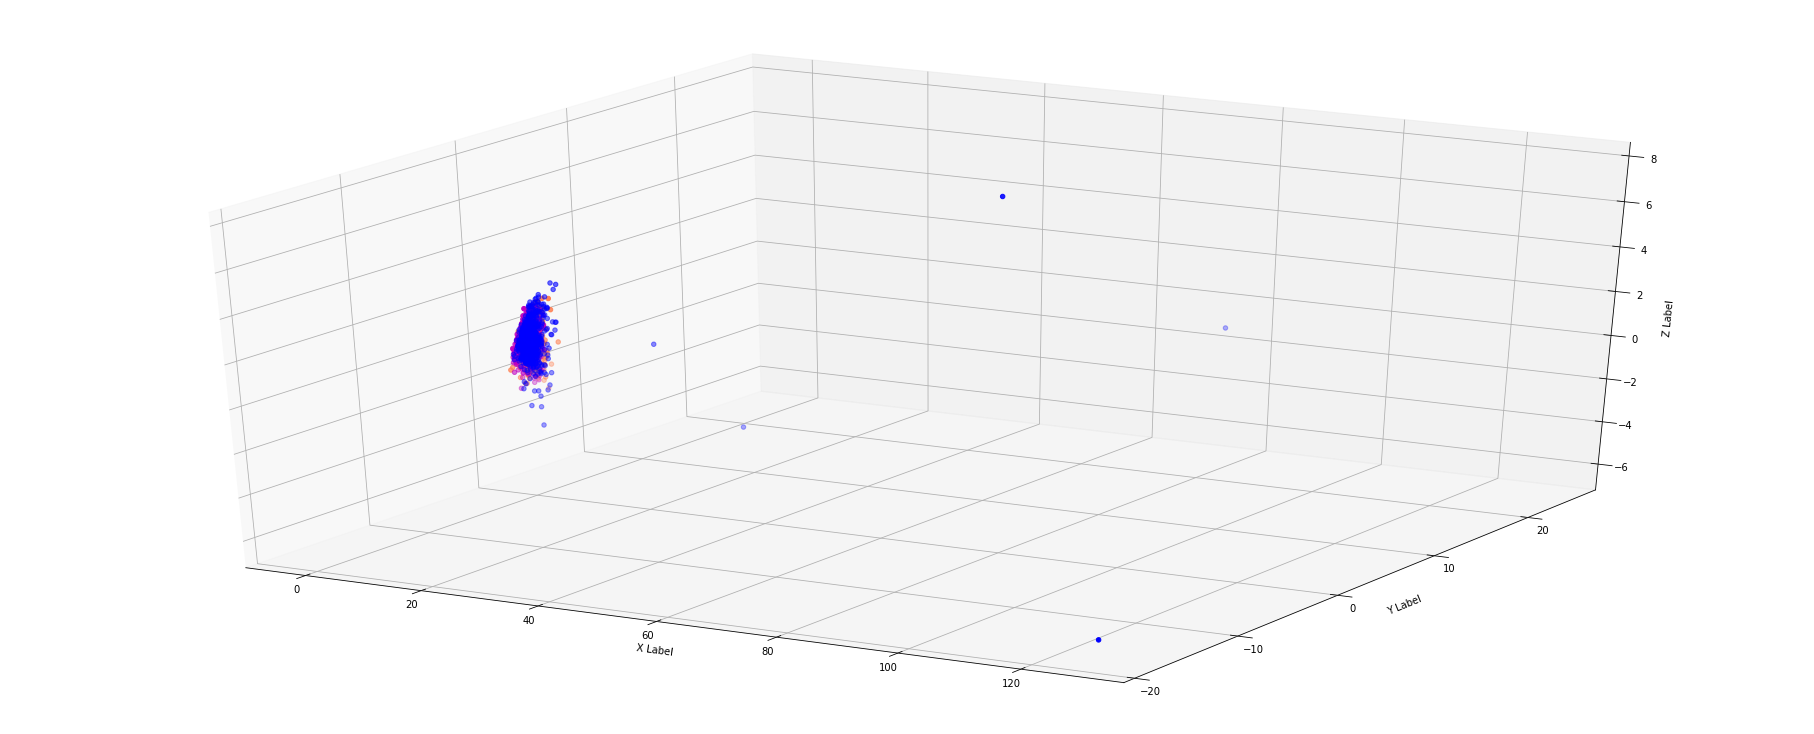

In [45]:
from mpl_toolkits.mplot3d import Axes3D
data_reduced3D = PCA(n_components = 3).fit_transform(data_counts.toarray())    #reduce to 3 dimenstions

col = ['coral', 'blue', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig, azim = -60, elev = 30)    #default angle

for c, category in zip(col, ['amazon', 'imdb', 'yelp']):
    xs = data_reduced3D[data['web'] == category].T[0]
    ys = data_reduced3D[data['web'] == category].T[1]
    zs = data_reduced3D[data['web'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

# Atrribute Transformation / Aggregation

In [46]:
term_frequencies = []
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

In [47]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

In [48]:
term_frequencies.shape

(5155,)

In [49]:
term_frequencies[0]

1

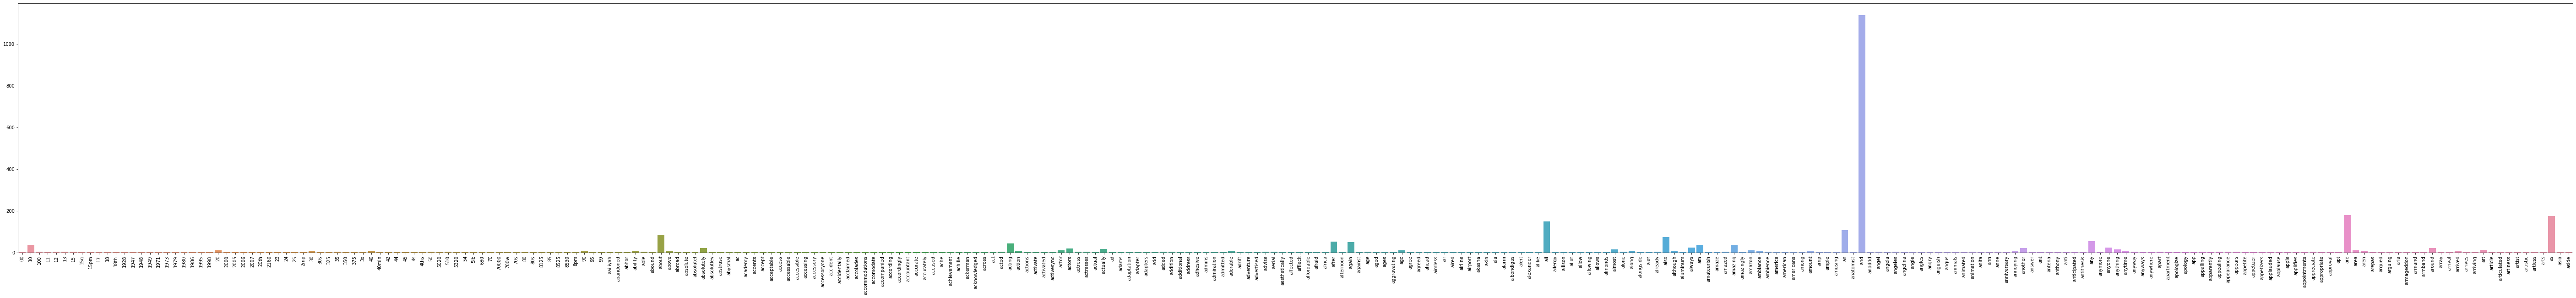

In [50]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [51]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

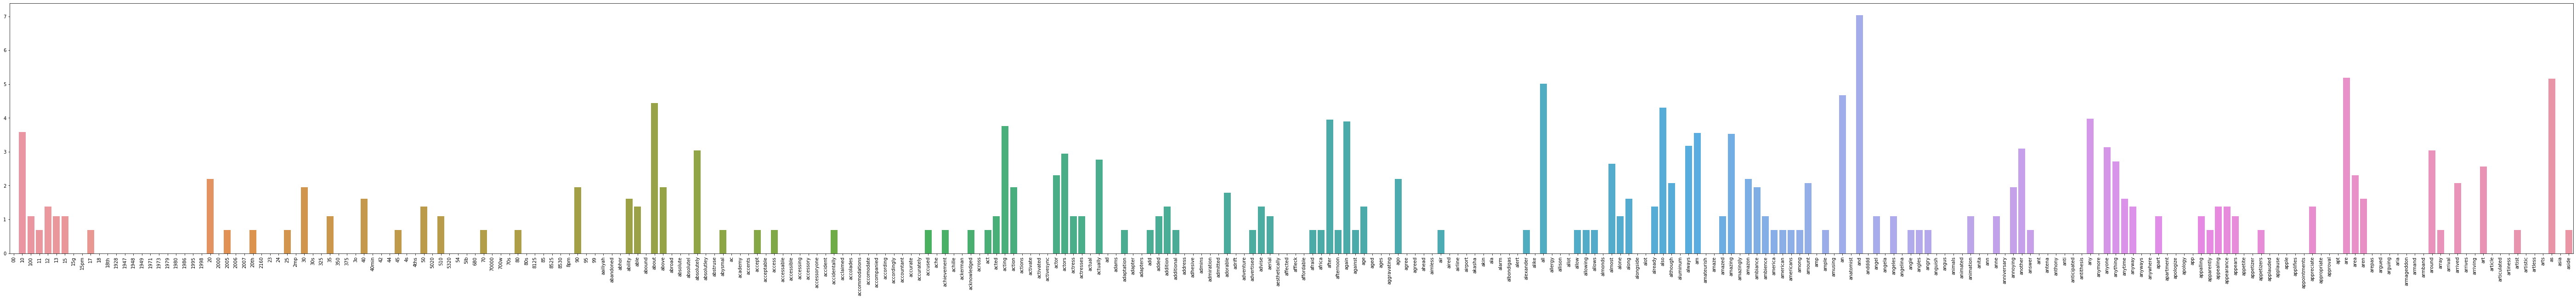

In [52]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

# Discretization and Binarization

In [53]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [54]:
mlb = preprocessing.LabelBinarizer()

In [55]:
mlb.fit(data.web)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [56]:
mlb.classes_

array(['amazon', 'imdb', 'yelp'], dtype='<U6')

In [57]:
data['bin_web'] = mlb.transform(data['web']).tolist()

In [58]:
data

,text,label,web,unigrams,bin_web
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,amazon,"[The, mic, is, great, .]","[1, 0, 0]"
...,...,...,...,...,...
2743,I think food should have flavor and texture an...,0,yelp,"[I, think, food, should, have, flavor, and, te...","[0, 0, 1]"
2744,Appetite instantly gone.,0,yelp,"[Appetite, instantly, gone, .]","[0, 0, 1]"
2745,Overall I was not impressed and would not go b...,0,yelp,"[Overall, I, was, not, impressed, and, would, ...","[0, 0, 1]"
2746,"The whole experience was underwhelming, and I ...",0,yelp,"[The, whole, experience, was, underwhelming, ,...","[0, 0, 1]"


# Data exploration

In [59]:
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [60]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [61]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [62]:
document_vector_count_1_bin.shape

(1, 5155)

In [63]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# New visulization

(-0.5, 799.5, 599.5, -0.5)

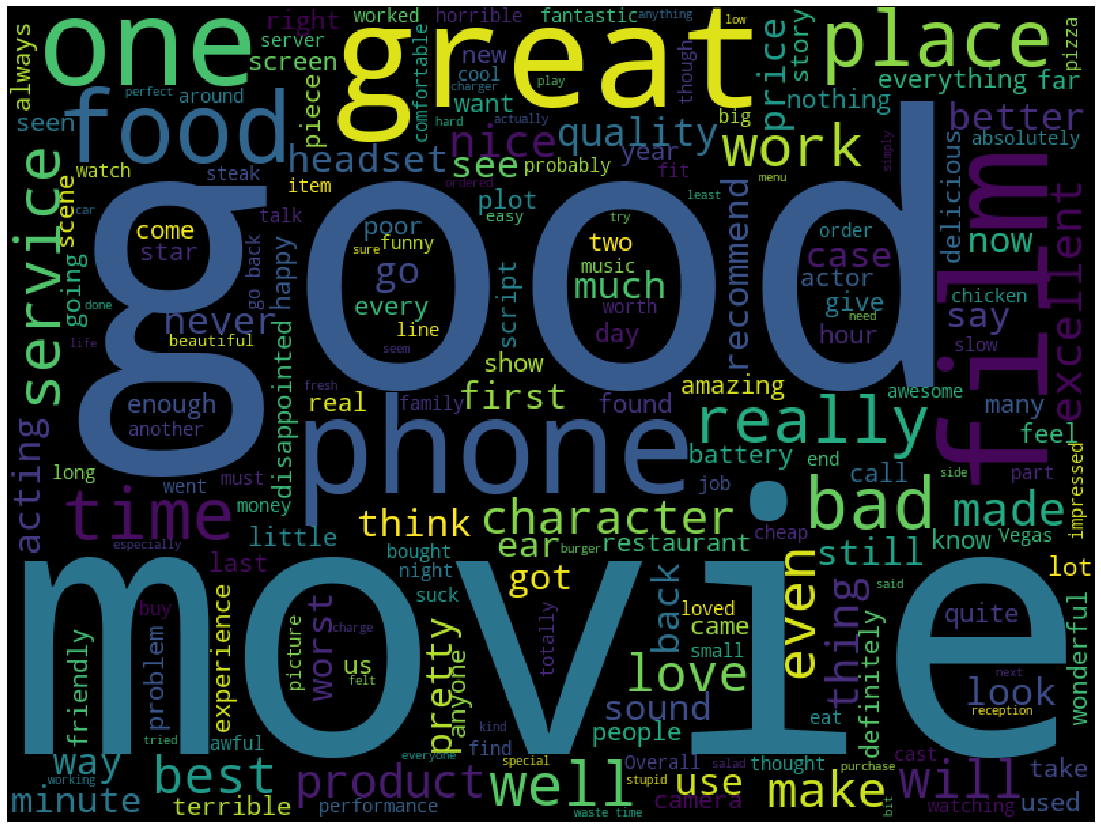

In [64]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(data.text))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

# TF-IDF

In [65]:
type(data.text)

pandas.core.series.Series

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = data.text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)    #store all the TF-IDFs in X
#print(vectorizer.get_feature_names())
print(X.shape)

(2731, 5155)


In [67]:
print(X[:30][:30])

  (0, 1013)	0.3974247626706531
  (0, 647)	0.22552149089185877
  (0, 1982)	0.23061573681226913
  (0, 4793)	0.3303965752179821
  (0, 4835)	0.2734078791282181
  (0, 4531)	0.08804875081176543
  (0, 2158)	0.22091318490920206
  (0, 2314)	0.3008057081827911
  (0, 2432)	0.12092348822270317
  (0, 3387)	0.3069219728545536
  (0, 4609)	0.1277326976526284
  (0, 2809)	0.22836646536189845
  (0, 1829)	0.15613426890690182
  (0, 4987)	0.24797095343745884
  (0, 3043)	0.2234924959811106
  (0, 2427)	0.12237411553084603
  (0, 4545)	0.2102498059634154
  (0, 4161)	0.18646625292056324
  (1, 4861)	0.6342135992620657
  (1, 1603)	0.472269140255879
  (1, 713)	0.5115101511401507
  (1, 1993)	0.33629203819538883
  (2, 2449)	0.8212743335641912
  (2, 2023)	0.40232185992144925
  (2, 4531)	0.1987085988818777
  :	:
  (27, 2376)	0.4486230675620596
  (27, 4553)	0.31365412133418985
  (27, 1266)	0.32736116352235617
  (27, 4529)	0.20473988815633234
  (27, 5015)	0.26840499873579077
  (27, 4531)	0.11186148717283835
  (27, 4609)	

# Naive Bayes classifier

In [68]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.text, data.label, test_size=0.25)
                #split the data into training and testing set, x is text, y is label, set the test size to the default 0.25

x_train = count_vect.fit_transform(x_train)
x_test = count_vect.transform(x_test)    #transform training set into word frequency values


mlt = MultinomialNB(alpha=1.0)    #multinomial naive Bayes
mlt.fit(x_train,y_train)    #store the trained connection between traning texts and labels into mlt
y_predict = mlt.predict(x_test)    #store the test result in y_predict

print("predicted labels：\n",y_predict)
print("accuracy：",mlt.score(x_test,y_test))

predicted labels：
 [1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0
 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0
 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1
 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1
 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0
 1 1 0

In [69]:
x_train, x_test, y_train, y_test = train_test_split(data.text, data.label, test_size=0.25)

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)    #transform training set into tf-idf values


mlt = MultinomialNB(alpha=1.0)
mlt.fit(x_train,y_train)
y_predict = mlt.predict(x_test)

print("predicted labels：\n",y_predict)
print("accuracy：",mlt.score(x_test,y_test))

predicted labels：
 [0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1
 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1
 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0
 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0
 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1
 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1
 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1
 1 1 1

TF-IDF classifier is a bit more accurate